<a href="https://colab.research.google.com/github/missaixxka/HomeworkJava/blob/main/list.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# List.java

In [ ]:
import java.util.Iterator;

public abstract class List implements Iterable<Integer> {
    public abstract int get(int index);
    public abstract void set(int index, int value);
    public abstract int size();
    public abstract void add(int value);
}

# ArrayList.java

In [ ]:
import java.util.Iterator;
import java.util.NoSuchElementException;

public class ArrayList extends List {
    private int size = 0;
    private int[] array;

    public ArrayList() {
        this.array = new int[10]; // начальная ёмкость
    }

    @Override
    public int size() {
        return size;
    }

    // Проверяем, не достигли ли 80% заполнения
    private void ensureCapacity() {
        if (size >= 0.8 * array.length) {
            resize();
        }
    }

    private void resize() {
        int newCapacity = array.length * 2;
        int[] newArray = new int[newCapacity];
        System.arraycopy(array, 0, newArray, 0, size);
        array = newArray;
    }

    @Override
    public void add(int value) {
        ensureCapacity();
        array[size] = value;
        size++;
    }

    @Override
    public void set(int index, int value) {
        if (index < 0 || index >= size) {
            throw new IndexOutOfBoundsException("Index: " + index + ", Size: " + size);
        }
        // ЗАМЕНА значения — НЕ вставка!
        array[index] = value;
    }

    @Override
    public int get(int index) {
        if (index < 0 || index >= size) {
            throw new IndexOutOfBoundsException("Index: " + index + ", Size: " + size);
        }
        return array[index];
    }

    @Override
    public Iterator<Integer> iterator() {
        return new ArrayListIterator();
    }

    private class ArrayListIterator implements Iterator<Integer> {
        private int currentIndex = 0;

        @Override
        public boolean hasNext() {
            return currentIndex < size;
        }

        @Override
        public Integer next() {
            if (!hasNext()) {
                throw new NoSuchElementException();
            }
            return array[currentIndex++];
        }
    }
}

# LinkedList.java

In [ ]:
import java.util.Iterator;
import java.util.NoSuchElementException;

public class LinkedList extends List {
    private int size = 0;
    private Node start = null;
    private Node end = null;

    // Вложенный статический класс — не зависит от экземпляра LinkedList
    private static class Node {
        int value;
        Node next;

        Node(int value) {
            this.value = value;
            this.next = null;
        }
    }

    @Override
    public int size() {
        return size;
    }

    @Override
    public void add(int value) {
        Node newNode = new Node(value);
        if (start == null) {
            start = end = newNode;
        } else {
            end.next = newNode;
            end = newNode;
        }
        size++;
    }

    @Override
    public void set(int index, int value) {
        if (index < 0 || index >= size) {
            throw new IndexOutOfBoundsException("Index: " + index + ", Size: " + size);
        }
        // Находим узел и ЗАМЕНЯЕМ значение — не создаём новый узел!
        Node current = start;
        for (int i = 0; i < index; i++) {
            current = current.next;
        }
        current.value = value;
    }

    @Override
    public int get(int index) {
        if (index < 0 || index >= size) {
            throw new IndexOutOfBoundsException("Index: " + index + ", Size: " + size);
        }
        Node current = start;
        for (int i = 0; i < index; i++) {
            current = current.next;
        }
        return current.value;
    }

    @Override
    public Iterator<Integer> iterator() {
        return new LinkedListIterator();
    }

    private class LinkedListIterator implements Iterator<Integer> {
        private Node current = start;

        @Override
        public boolean hasNext() {
            return current != null;
        }

        @Override
        public Integer next() {
            if (!hasNext()) {
                throw new NoSuchElementException();
            }
            int value = current.value;
            current = current.next;
            return value;
        }
    }
}


# Main.java

In [ ]:
public class Main {
    public static void main(String[] args) {
        System.out.println("=== Тестирование ArrayList ===");
        testArrayList();

        System.out.println("\n=== Тестирование LinkedList ===");
        testLinkedList();
    }

    public static void testArrayList() {
        ArrayList list = new ArrayList();

        // Добавляем элементы
        for (int i = 1; i <= 6; i++) {
            list.add(i * 10);
        }
        System.out.println("Размер после добавления 6 элементов: " + list.size()); // 6

        // Проверяем get
        System.out.println("Элементы: ");
        for (int i = 0; i < list.size(); i++) {
            System.out.print(list.get(i) + " ");
        }
        System.out.println();

        // Тестируем set — ЗАМЕНА
        list.set(2, 999);
        System.out.println("После set(2, 999): " + list.get(2)); // 999
        System.out.println("Размер после set: " + list.size()); // всё ещё 6!

        // Проверяем расширение (добавим до >8 элементов в массив ёмкостью 10 → 80% = 8)
        for (int i = 7; i <= 12; i++) {
            list.add(i * 10);
        }
        System.out.println("Размер после расширения: " + list.size()); // 12 — должно работать

        // for-each
        System.out.print("Через for-each: ");
        for (int value : list) {
            System.out.print(value + " ");
        }
        System.out.println();
    }

    public static void testLinkedList() {
        LinkedList list = new LinkedList();

        // Добавляем
        for (int i = 1; i <= 5; i++) {
            list.add(i * 100);
        }
        System.out.println("Размер LinkedList: " + list.size()); // 5

        // Печать через get
        System.out.print("Элементы: ");
        for (int i = 0; i < list.size(); i++) {
            System.out.print(list.get(i) + " ");
        }
        System.out.println();

        // set — замена
        list.set(1, 888);
        System.out.println("После set(1, 888): " + list.get(1)); // 888
        System.out.println("Размер после set: " + list.size()); // всё ещё 5

        // Итератор вручную
        java.util.Iterator<Integer> it = list.iterator();
        System.out.print("Через итератор: ");
        while (it.hasNext()) {
            System.out.print(it.next() + " ");
        }
        System.out.println();

        // for-each
        System.out.print("Через for-each: ");
        for (int value : list) {
            System.out.print(value + " ");
        }
        System.out.println();
    }
}


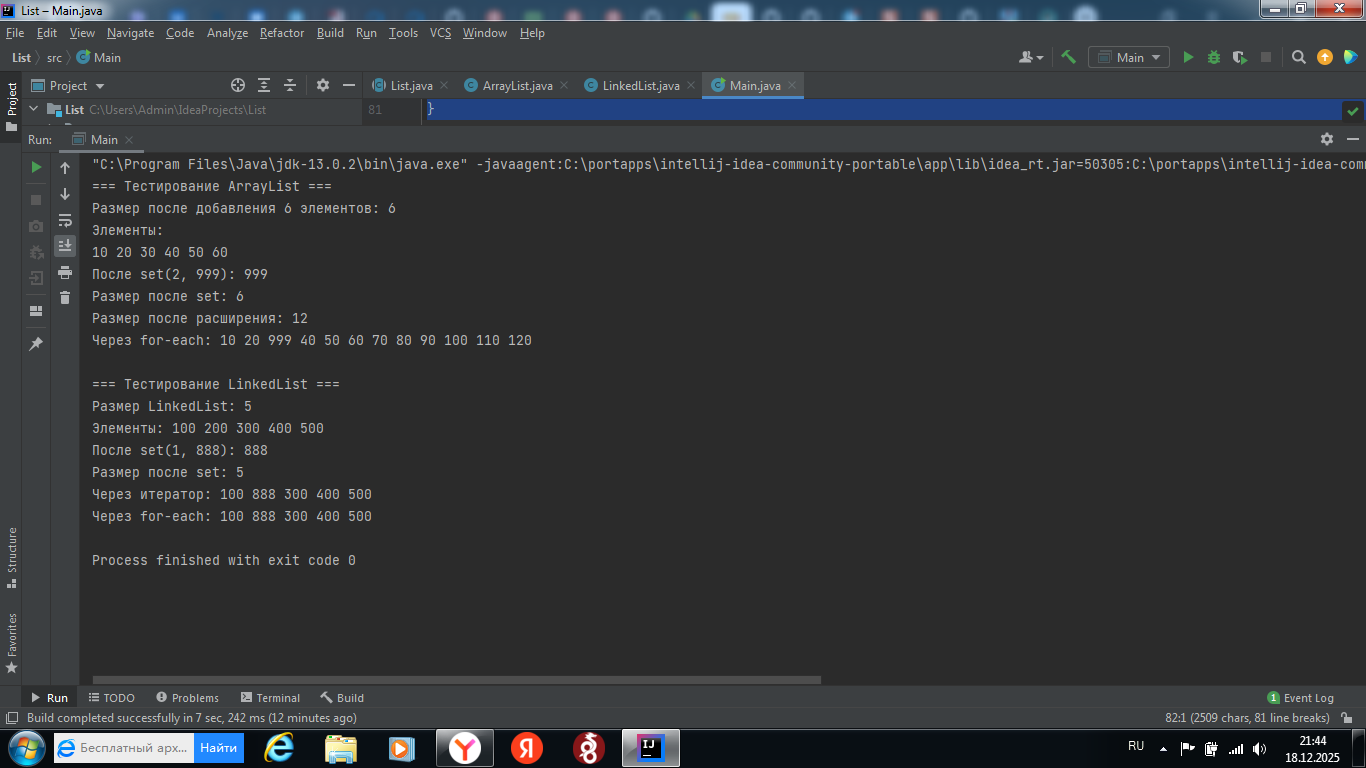